<a href="https://colab.research.google.com/github/ggarci10/4961kaur/blob/main/logregpickel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from  sklearn.model_selection  import  GridSearchCV

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

import os
import sys
import pickle
!git clone https://github.com/ggarci10/4961kaur.git
%cd /content/4961kaur/

Cloning into '4961kaur'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 93 (delta 18), reused 3 (delta 3), pack-reused 66
Receiving objects: 100% (93/93), 1.18 MiB | 2.67 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/4961kaur


In [2]:
dummy = 'DummyDatanew.csv'

df = pd.read_csv(dummy)

df.head()


,Unnamed: 0,Date,Event_ID,Duration,Volume,WaterClassify,EventFlowRate,meterNumber,gw,CustomerId,Month,Leak,Building Type,Square Footage,Year constructed,Climate region,Number of workers
0,0,2023-06-01 00:08:33,0,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
1,1,2023-06-01 03:24:03,1,0.0,1.851562,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
2,2,2023-06-01 08:04:32,2,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
3,3,2023-06-01 08:10:41,3,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
4,4,2023-06-01 08:23:09,4,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256


In [3]:
from datetime import datetime

current_year = datetime.now().year
df.loc[:, 'BuildAge'] = current_year - df['Year constructed'] - 1
df.drop('Year constructed', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

df['Square Footage'] = df['Square Footage'].str.replace(',', '').astype(int)

df.head()

,Event_ID,Duration,Volume,WaterClassify,EventFlowRate,meterNumber,gw,CustomerId,Leak,Building Type,Square Footage,Climate region,Number of workers,BuildAge
0,0,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
1,1,0.0,1.851562,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
2,2,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
3,3,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
4,4,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17


In [4]:
encode = ['WaterClassify', 'meterNumber', 'gw','CustomerId','Building Type','Climate region']

df = pd.get_dummies(df, columns=encode)

df.head()

,Event_ID,Duration,Volume,EventFlowRate,Leak,Square Footage,Number of workers,BuildAge,WaterClassify_HighCon,WaterClassify_LowCon,WaterClassify_MedCon,WaterClassify_Outliers,meterNumber_19240566,gw_b827eb5e5925,gw_b827eb5e5926,CustomerId_10849,Building Type_Office,Climate region_Very cold/Cold
0,0,0.0,0.265625,0.0,No,250000,256,17,False,True,False,False,True,True,False,True,True,True
1,1,0.0,1.851562,0.0,No,250000,256,17,False,True,False,False,True,True,False,True,True,True
2,2,0.0,0.265625,0.0,No,250000,256,17,False,True,False,False,True,True,False,True,True,True
3,3,0.0,0.000000,0.0,No,250000,256,17,False,True,False,False,True,True,False,True,True,True
4,4,0.0,0.000000,0.0,No,250000,256,17,False,True,False,False,True,True,False,True,True,True


In [6]:
feature_cols = ['Duration','Volume','EventFlowRate','Square Footage',
                'Number of workers','BuildAge','WaterClassify_HighCon','WaterClassify_LowCon',
                'WaterClassify_MedCon','WaterClassify_Outliers','meterNumber_19240566',
                'gw_b827eb5e5925','gw_b827eb5e5926','CustomerId_10849','Building Type_Office',
                'Climate region_Very cold/Cold']

X = df[feature_cols]

X

,Duration,Volume,EventFlowRate,Square Footage,Number of workers,BuildAge,WaterClassify_HighCon,WaterClassify_LowCon,WaterClassify_MedCon,WaterClassify_Outliers,meterNumber_19240566,gw_b827eb5e5925,gw_b827eb5e5926,CustomerId_10849,Building Type_Office,Climate region_Very cold/Cold
0,0.0,0.265625,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
1,0.0,1.851562,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
2,0.0,0.265625,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
3,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
4,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
1032,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
1033,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
1034,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True


In [7]:
y = df['Leak']

y

0       No
1       No
2       No
3       No
4       No
        ..
1031    No
1032    No
1033    No
1034    No
1035    No
Name: Leak, Length: 1036, dtype: object

In [8]:
leaks = df['Leak'].value_counts()
print(leaks)

Leak
No     807
Yes    229
Name: count, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
counter_before = Counter(y_train)
print('Before balancing :', counter_before)


smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)
counter_after = Counter(y_train)
print('After balancing:', counter_after)

Before balancing : Counter({'No': 642, 'Yes': 186})
After balancing: Counter({'No': 642, 'Yes': 642})


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
my_logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

counter_before = Counter(y_train)
print('Before balancing :', counter_before)


smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)
counter_after = Counter(y_train)
print('After balancing:', counter_after)


my_logreg.fit(X_train,y_train)
y_predict_logreg=my_logreg.predict(X_test)
logregaccuracy=accuracy_score(y_test,y_predict_logreg)
y_predict_prob_logreg = my_logreg.predict_proba(X_test)
print(round(logregaccuracy, 2))

Before balancing : Counter({'No': 650, 'Yes': 178})
After balancing: Counter({'No': 650, 'Yes': 650})
0.94


In [12]:
fprlogreg, tprlogreg, thresholdslogreg = metrics.roc_curve(y_test, y_predict_prob_logreg[:,1], pos_label='Yes')

print(fprlogreg)
print(tprlogreg)
AUClogreg = metrics.auc(fprlogreg, tprlogreg)
print(AUClogreg)

[0.         0.         0.         0.00636943 0.00636943 0.00636943
 0.01910828 0.03821656 0.05095541 0.05095541 0.05095541 0.65605096
 0.65605096 0.66878981 0.66878981 0.68152866 0.70700637 0.85987261
 0.87261146 0.87261146 0.92993631 0.94267516 1.        ]
[0.         0.01960784 0.11764706 0.11764706 0.15686275 0.17647059
 0.17647059 0.17647059 0.17647059 0.90196078 0.92156863 0.92156863
 0.94117647 0.94117647 0.96078431 0.96078431 0.96078431 0.96078431
 0.96078431 1.         1.         1.         1.        ]
0.9014612214312476


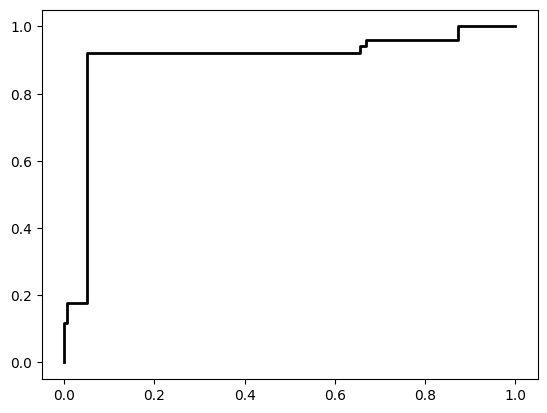

In [13]:
%matplotlib inline

plt.figure()
plt.plot(fprlogreg, tprlogreg, color='black', lw=2,label='logreg ROC Curve (area = %0.2f)' % AUClogreg)

In [14]:
results = pd.DataFrame()

results['actual'] = y_test
results['prediction'] = y_predict_logreg

pd.set_option('display.max_rows', None)
print(results)


     actual prediction
244      No         No
805      No         No
277      No         No
1026     No         No
578     Yes        Yes
131      No         No
693     Yes        Yes
143      No         No
133      No         No
218      No         No
372      No         No
225      No         No
635     Yes        Yes
663     Yes        Yes
1030     No         No
191      No         No
843      No         No
641     Yes        Yes
571     Yes        Yes
217      No         No
700     Yes        Yes
11      Yes        Yes
381      No         No
353      No        Yes
305      No         No
537     Yes         No
475      No         No
419      No         No
731      No         No
426      No         No
704      No        Yes
223      No         No
16      Yes        Yes
358      No         No
171      No         No
666     Yes        Yes
908     Yes        Yes
603     Yes        Yes
253      No         No
770      No         No
781      No         No
307      No         No
582     Yes

In [ ]:
# projectabspathname = os.path.abspath('projectSaya1.pickle')
# print(projectabspathname)
# projectname = 'Saya.ipynb'
# projectpickle = open(str(projectabspathname),'wb')
# pickle.dump(projectname, projectpickle)
# projectpickle.close()

/content/4961kaur/projectSaya1.pickle


In [17]:
sample = [[0.0, 0.265625, 0.0, 250000,  256, 17, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]]

y_predict = my_logreg.predict(sample)
print(y_predict)

['No']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
with open('projectPickle.pkl', 'wb') as f:
    pickle.dump(my_logreg, f)